In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
data = pd.read_csv("train (1).csv")

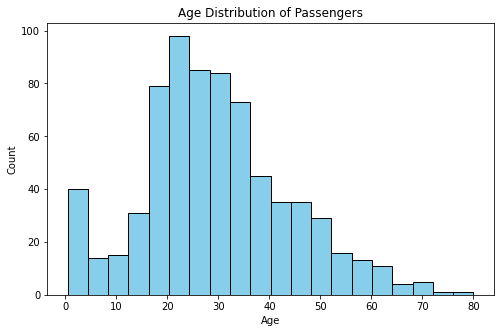

In [26]:
# Plot the distribution of passengers' ages
plt.figure(figsize=(8, 5))
plt.hist(data['Age'].dropna(), bins=20, edgecolor='k', color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

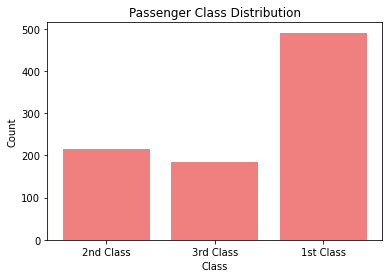

In [27]:
# Plot the distribution of passenger classes
class_counts = data['Pclass'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='lightcoral')
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

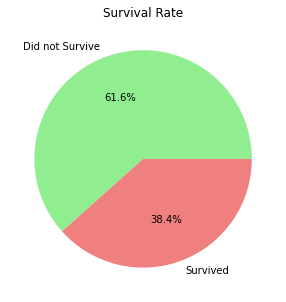

In [28]:
# Plot the survival count
survival_counts = data['Survived'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=['Did not Survive', 'Survived'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Survival Rate')
plt.show()

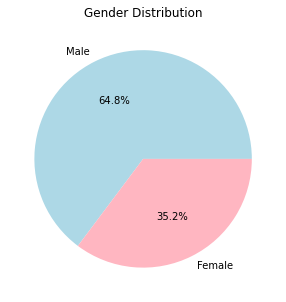

In [29]:
# Plot the gender distribution
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.show()

In [30]:
# Preprocessing the data
data = data.drop(['Name','Cabin', 'Ticket', 'PassengerId'], axis=1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data = data.fillna(data.mean())

In [31]:
# Define the target feature
target = 'Survived'

# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [33]:
print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
